# **MÓDULO 13**
# Projeto - Fundamentos da Descoberta de Dados

Nesse projeto trabalharemos com a base de dados de produtos de um supermercado do Chile.
A ideia é que vocês apliquem os conceitos estatísticos vistos no último módulo, mais os conceitos de visualizações de dados através de gráficos e finalizem publicando no seu github!

Tratamento de Erros (Como Aplicar):

    errors='coerce': Esta é uma opção muito poderosa. Se pd.to_numeric encontrar um valor que não pode ser convertido em número (por exemplo, a string 'abc'), ela substituirá esse valor por NaN (Not a Number). Isso é extremamente útil para limpar dados, pois permite que você identifique e lide com valores problemáticos sem que a operação falhe.

    errors='raise': (Padrão) Se houver um valor não numérico, um erro será levantado.

    errors='ignore': Se houver um valor não numérico, o valor original será retornado.

In [17]:
import pandas as pd  # Biblioteca para manipulação de dados com DataFrames (Tabelas)
import numpy as np  # Biblioteca para cálculos numéricos e funções matemáticas

import seaborn as sns  # Biblioteca para visualização de dados estatísticos
import matplotlib.pyplot as plt  # Biblioteca para visualização de gráficos estáticos
import plotly.express as px  # Biblioteca para visualização de gráficos interativos

from IPython.display import display  # Função para melhorar a exibição de DataFrames no Colab/Jupyter


Faça a leitura dos dados do arquivo CSV:


Altere o código abaixo de acordo com seu diretório.

In [18]:
#ETAPA DE COLETA - Leitura dos dados do arquivo CSV

df = pd.read_csv("MODULO7_PROJETOFINAL_BASE_SUPERMERCADO.csv", delimiter=',')

df.head(-10)

,title,Marca,Preco_Normal,Preco_Desconto,Preco_Anterior,Desconto,Categoria
0,"Pack 12 un, Leche extra proteína 1 L",Loncoleche,19788,0,0,0,lacteos
1,"Pack 12 un, Leche chocolate receta original 1 L",Soprole,18228,0,0,0,lacteos
2,"Pack 12 un, Leche semidescremada chocolate 1 L",Soprole,18228,0,0,0,lacteos
3,"Pack 12 un, Leche semidescremada frutilla 1 L",Soprole,18228,0,0,0,lacteos
4,"Pack 12 un, Leche sin lactosa chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
...,...,...,...,...,...,...,...
1092,Jabón líquido original 700 ml,Dove,0,2659,3549,890,belleza-y-cuidado-personal
1093,Jabón líquido karité 700 ml,Dove,0,2659,3549,890,belleza-y-cuidado-personal
1094,Jabón líquido mandarina 700 ml,Dove,0,2659,3549,890,belleza-y-cuidado-personal
1095,Shampoo Pro-V Rizos Definidos 300 ml,Pantene,0,1990,2889,899,belleza-y-cuidado-personal


In [19]:
#ETAPA DE VALIDAÇÃO - Informações iniciais tipologia do DataFrame - Classes
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1107 entries, 0 to 1106
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           1107 non-null   object
 1   Marca           1107 non-null   object
 2   Preco_Normal    1107 non-null   int64 
 3   Preco_Desconto  1107 non-null   int64 
 4   Preco_Anterior  1107 non-null   int64 
 5   Desconto        1107 non-null   int64 
 6   Categoria       1107 non-null   object
dtypes: int64(4), object(3)
memory usage: 60.7+ KB
None


In [20]:
#ETAPA DE VALIDAÇÃO - Informações iniciais do DataFrame - Visualização DataFrame (Primeiras e últimas 5 linhas)

#pd.set_option('display.max_columns', None)  # Exibe todas as colunas
#pd.set_option('display.max_rows', 100)      # Exibe até 100 linhas

df.head(-5) #Exibe as 5 primeiras e últimas linhas

,title,Marca,Preco_Normal,Preco_Desconto,Preco_Anterior,Desconto,Categoria
0,"Pack 12 un, Leche extra proteína 1 L",Loncoleche,19788,0,0,0,lacteos
1,"Pack 12 un, Leche chocolate receta original 1 L",Soprole,18228,0,0,0,lacteos
2,"Pack 12 un, Leche semidescremada chocolate 1 L",Soprole,18228,0,0,0,lacteos
3,"Pack 12 un, Leche semidescremada frutilla 1 L",Soprole,18228,0,0,0,lacteos
4,"Pack 12 un, Leche sin lactosa chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
...,...,...,...,...,...,...,...
1097,"Helado multipack Frugelé 18 un, 60 ml c/u",Bresler,0,4509,5499,990,congelados
1098,"Jabón barra original 3 un, de 90 g",Dove,0,2659,3659,1000,belleza-y-cuidado-personal
1099,Shampoo Fuerza Extrema 400 ml,Dove Men,0,2690,3699,1009,belleza-y-cuidado-personal
1100,Postre helado chocolate blanco frambuesa 900 ml,Magnum,0,4279,5349,1070,congelados


In [21]:
#ETAPA DE ISOLAMENTO - Verificar e Ajuste da coluna ['Desconto']

df['Desconto'] = pd.to_numeric(df['Desconto']) #função da biblioteca pandas em Python,serve principalmente para converter argumentos (como uma Série ou um array) em um tipo de dado numérico.

df['Desconto_%'] = np.where(
    df['Preco_Anterior'] > 0,
    (df['Desconto'] / df['Preco_Anterior']) * 100,
    0.0
)

pd.options.display.float_format = '{:.2f}'.format

print("\n Primeiras e últimas 5 linhas do DataFrame com a nova coluna 'Desconto_Percentual':\n")
display(df.head(5))

print("\n Primeiras e últimas 5 linhas do DataFrame com a nova coluna 'Desconto_Percentual':\n")
display(df.tail(5))




 Primeiras e últimas 5 linhas do DataFrame com a nova coluna 'Desconto_Percentual':



,title,Marca,Preco_Normal,Preco_Desconto,Preco_Anterior,Desconto,Categoria,Desconto_%
0,"Pack 12 un, Leche extra proteína 1 L",Loncoleche,19788,0,0,0,lacteos,0.00
1,"Pack 12 un, Leche chocolate receta original 1 L",Soprole,18228,0,0,0,lacteos,0.00
2,"Pack 12 un, Leche semidescremada chocolate 1 L",Soprole,18228,0,0,0,lacteos,0.00
3,"Pack 12 un, Leche semidescremada frutilla 1 L",Soprole,18228,0,0,0,lacteos,0.00
4,"Pack 12 un, Leche sin lactosa chocolate 1 L",Loncoleche,17988,0,0,0,lacteos,0.00



 Primeiras e últimas 5 linhas do DataFrame com a nova coluna 'Desconto_Percentual':



,title,Marca,Preco_Normal,Preco_Desconto,Preco_Anterior,Desconto,Categoria,Desconto_%
1102,"Helado bresler pote cassata 2,4l",Bresler,0,4359,5449,1090,congelados,20.00
1103,"Helado Trisabor chocolate lúcuma y manjar 2,4 L",Bresler,0,4359,5449,1090,congelados,20.00
1104,Shampoo Reconstrucción Completa 400 ml,Dove,0,2690,3849,1159,belleza-y-cuidado-personal,30.11
1105,Acondicionador Hidratación Intensa 400 ml,Dove,0,2690,3849,1159,belleza-y-cuidado-personal,30.11
1106,Leche en Polvo Nido Forticrece Sin lactosa 1440g,Nido,0,14550,18899,4349,lacteos,23.01


⚫***RESSALVAS - COLUNAS***

Os campos do nosso dataframe são:

**Title:** Nome do produto.


**Marca:** A marca do produto.


**Preco_Normal:** O preço em que o produto costuma ser vendido quando não há desconto.


**Preco_Desconto:** O preço vendido após o desconto ser aplicado.


**Preco_Anterior:** Preço em que era comercializado o produto antes do desconto aplicado.


**Desconto:** Total de desconto aplicado.






As colunas que aparecem com valores 0 são para os produtos onde não tivemos descontos aplicados.


As categorias estão em espanhol!

In [22]:
#ETAPA DE ISOLAMENTO - Informações iniciais tipologia do DataFrame - Classes (Após tratamento)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1107 entries, 0 to 1106
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           1107 non-null   object 
 1   Marca           1107 non-null   object 
 2   Preco_Normal    1107 non-null   int64  
 3   Preco_Desconto  1107 non-null   int64  
 4   Preco_Anterior  1107 non-null   int64  
 5   Desconto        1107 non-null   int64  
 6   Categoria       1107 non-null   object 
 7   Desconto_%      1107 non-null   float64
dtypes: float64(1), int64(4), object(3)
memory usage: 69.3+ KB


# 1 - Traga a média e a mediana dos preços - coluna Preco_Normal - por categoria de produto.
# Identifique as categorias que parecem ter um valor de média abaixo ou acima da mediana.

# Resposta:

A saída mostra a mediana do Preco_Normal para cada categoria de produto. A mediana é o valor do meio em um conjunto de dados ordenado, o que a torna menos sensível a valores extremos (outliers) do que a média.

In [23]:
#ETAPA DE ESTATÍSTICA - Calcular a média de 'Preco_Normal' por 'Categoria'


preco_stats = df.groupby('Categoria')['Preco_Normal'].agg(['mean']) # --> df.groupby('Categoria'): Agrupa o DataFrame df com base nos valores únicos da coluna...
#...O resultado é um novo DataFrame onde o índice são as categorias e a coluna é a mediana dos preços normais para cada categoria.


# Renomear as colunas para clareza:
preco_stats = preco_stats.rename(columns={'mean': 'Preco_Normal_Medio'})

print("Média de Preco_Normal por Categoria:")
print(preco_stats.sort_values(by='Preco_Normal_Medio', ascending=False)) # Ordenar para melhor visualização
print("\n" + "="*80 + "\n")


Média de Preco_Normal por Categoria:
                            Preco_Normal_Medio
Categoria                                     
comidas-preparadas                     3095.04
lacteos                                2385.22
congelados                             2108.04
belleza-y-cuidado-personal             1783.56
frutas                                 1724.47
verduras                               1343.30
instantaneos-y-sopas                    765.49




In [24]:
#ETAPA DE ESTATÍSTICA - Calcular a mediana de 'Preco_Normal' por 'Categoria'

preco_stats2 = df.groupby('Categoria')['Preco_Normal'].agg(['median'])

preco_stats2 = preco_stats2.rename(columns={'median': 'Preco_Normal_Mediana'})

print("Mediana de Preco_Normal por Categoria:")
print(preco_stats2.sort_values(by='Preco_Normal_Mediana', ascending=False)) # Ordenar para melhor visualização
print("\n" + "="*80 + "\n")

Mediana de Preco_Normal por Categoria:
                            Preco_Normal_Mediana
Categoria                                       
comidas-preparadas                       3290.00
belleza-y-cuidado-personal               1569.00
congelados                               1519.00
frutas                                   1195.00
verduras                                 1180.00
lacteos                                   989.00
instantaneos-y-sopas                      439.00




In [25]:
#ETAPA DE COMPARAÇÃO - Iterar sobre as categorias para comparar média e mediana


#Identificação das categorias com valor de média abaixo ou acima da mediana:

#Unir os dois DataFrames: preco_stats (média) e preco_stats2 (mediana):
preco_comparacao = pd.merge(preco_stats, preco_stats2, left_index=True, right_index=True)

#Criação de coluna de comparação:
preco_comparacao['Comparacao'] = np.where(
    preco_comparacao['Preco_Normal_Medio'] > preco_comparacao['Preco_Normal_Mediana'],
    'Média Acima da Mediana',
    'Média Abaixo da Mediana'
)

# Exibir o resultado ordenado:
print("Comparação entre Média e Mediana de Preco_Normal por Categoria:")
print(preco_comparacao.sort_values(by='Preco_Normal_Medio', ascending=False))

print("\n" + "="*80 + "\n")



Comparação entre Média e Mediana de Preco_Normal por Categoria:
                            Preco_Normal_Medio  Preco_Normal_Mediana  \
Categoria                                                              
comidas-preparadas                     3095.04               3290.00   
lacteos                                2385.22                989.00   
congelados                             2108.04               1519.00   
belleza-y-cuidado-personal             1783.56               1569.00   
frutas                                 1724.47               1195.00   
verduras                               1343.30               1180.00   
instantaneos-y-sopas                    765.49                439.00   

                                         Comparacao  
Categoria                                            
comidas-preparadas          Média Abaixo da Mediana  
lacteos                      Média Acima da Mediana  
congelados                   Média Acima da Mediana  
belleza-y-cuidado



---



#Digite aqui as categorias que parecem ter um valor de média abaixo ou acima da mediana:

#Resposta

'Comidas-preparadas' - Tem a maior mediana de 'Preço_Normal' (3290.00), indicando que metade dos produtos nessa categoria custam pelo menos 3290.00.

'instantaneos-y-sopas' - Tem a menor mediana de 'Preço_Normal' (439.00), sugerindo que a maioria dos produtos nessa categoria tende a ser mais baratos.



---



ETAPA DE COMPARAÇÃO - Maior Mediana

 'Comidas-preparadas'

  Maior mediana: R$ 3.290,00

  -> Pelo menos 50% dos produtos dessa categoria custam R$ 3.290,00 ou mais.

  -> É uma categoria com preços elevados, e a mediana alta indica que não se trata de um ou dois produtos caros, mas sim que a maioria dos produtos já tem esse valor.

  -> Pode ser uma categoria mais premium.



---



ETAPA DE COMPARAÇÃO - Menor Mediana

'instantaneos-y-sopas'

   Menor mediana: R$ 439,00

   -> A maioria dos produtos dessa categoria custa R$ 439,00 ou menos.

   -> Mostra que é uma categoria com preços acessíveis e bem inferiores em relação a outras categorias.

   -> Reflete o perfil dos produtos: alimentos rápidos, baratos e de consumo cotidiano.



---



# 2 - Traga o desvio padrão por categoria de produto.
# Qual o comportamento da média e mediana nas categorias com maior desvio?

In [26]:
#ETAPA DE IDENTIFICAÇÃO

#Calculo do desvio padrão de 'Preco_Normal' por categoria:

preco_desvio = df.groupby('Categoria')['Preco_Normal'].std().reset_index()
preco_desvio = preco_desvio.rename(columns={'Preco_Normal': 'Desvio_Padrao'})

#Ordenar para ver as categorias com maior desvio:
preco_desvio = preco_desvio.sort_values(by='Desvio_Padrao', ascending=False)

print("Desvio padrão de Preco_Normal por Categoria:")
print(preco_desvio)
print("\n" + "="*80 + "\n")



Desvio padrão de Preco_Normal por Categoria:
                    Categoria  Desvio_Padrao
5                     lacteos        3925.82
0  belleza-y-cuidado-personal        2210.04
2                  congelados        2111.54
1          comidas-preparadas        2019.91
3                      frutas        1639.15
4        instantaneos-y-sopas        1170.23
6                    verduras        1012.70




#Digite nesse campo o comportamento que você identificou.


#Resposta:

Identiquei os maiores e menores desvios (outliers), sendo:

  Maiores Desvios (mais caros) -> lacteos (3925.82), seguido de belleza-y-cuidado-personal (2210.04).

  Menor Desvio Padrão (menores preço)-> verduras (1012.70).

# 3 - Plot um boxplot da distribuição do Preco_Normal para a categoria que você identificou que tem o maior desvio padrão. Como é a distribuição desses dados segundo o boxplot? Você identifica muitos outliers?

Dica: Para trazer apenas os dados da categoria que você deseja você pode usar o df.loc[df['Categoria'] == 'CATEGORIA ESCOLHIDA'

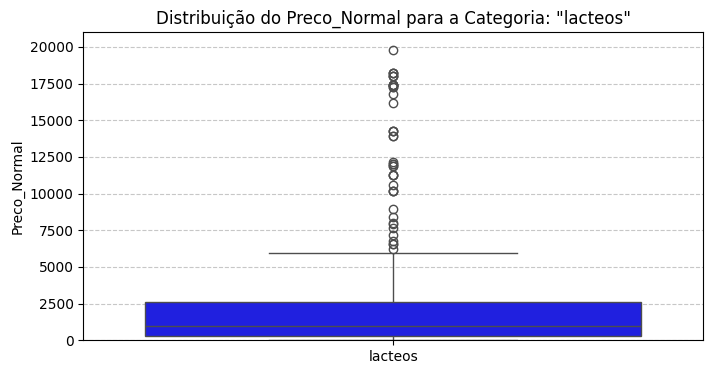

In [27]:
#ETAPA PLOATEGEM

df_categoria_identificada = df.loc[df['Categoria'] == 'lacteos'].copy()

plt.figure(figsize=(8,4))

sns.boxplot(x=df_categoria_identificada['Categoria'], y=df_categoria_identificada['Preco_Normal'], color='blue')

plt.title(f'Distribuição do Preco_Normal para a Categoria: "lacteos"')

plt.ylabel('Preco_Normal')
plt.ylim(0, 21000)
plt.xlabel('') # Eixo X vazio pois é apenas uma categoria

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

#Resposta:

A distribuição de 'Lacteos' apresenta distribuição mais dispersas e assimétricas.

Sobre os Outliers, identifico muitos, onde aparecem valores de preço extremamente altos no boxplot, como valores em 20.000.

# 4 - Plote um gráfico de barras onde temos a média de descontos por categoria.

<ipython-input-34-41b1477c0beb>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Categoria', x='Desconto', data=media_desconto_por_categoria, palette='magma')


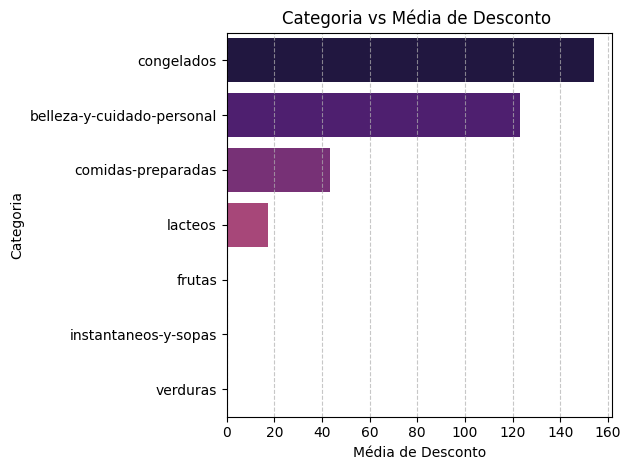

In [34]:
#ETAPA PLOATEGEM - Barras

media_desconto_por_categoria = df.groupby('Categoria')['Desconto'].mean().reset_index()

media_desconto_por_categoria = media_desconto_por_categoria.sort_values(by='Desconto', ascending=False)


sns.barplot(y='Categoria', x='Desconto', data=media_desconto_por_categoria, palette='magma')



plt.title('Categoria vs Média de Desconto ')
plt.xlabel('Média de Desconto')
plt.ylabel('Categoria')

plt.grid(axis='x', linestyle='--', alpha=0.7)


plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.show()

# 5 - Plote um gráfico de mapa interativo agrupando os dados por categoria, marca e trazendo a média de desconto.

In [42]:
# ETAPA PLOATEGEM - Treemap interativo usando Plotly Express

#VERIFIQUE E AJUSTE ESTES NOMES DE COLUNA CONFORME SEU DATAFRAME:

COLUNA_CATEGORIA = 'Categoria'
COLUNA_MARCA = 'Marca'
COLUNA_DESCONTO = 'Desconto'

#Verifique se as colunas necessárias existem:
colunas_requeridas = [COLUNA_CATEGORIA, COLUNA_MARCA, COLUNA_DESCONTO]


if not all(col in df.columns for col in colunas_requeridas):
    print("ERRO: Verifique se todas as colunas necessárias existem no DataFrame.")
    print(f"Colunas esperadas: {colunas_requeridas}")
    print(f"Colunas encontradas: {df.columns.tolist()}")

else:
    #Preparar os dados: Remover linhas com Desconto (ausente ou infinito):
    df_mapa = df.dropna(subset=[COLUNA_DESCONTO]).copy()
    df_mapa = df_mapa[np.isfinite(df_mapa[COLUNA_DESCONTO])].copy()


    #Agrupar por Categoria e Marca e calcular a média do Desconto:
    dados_agrupados = df_mapa.groupby([COLUNA_CATEGORIA, COLUNA_MARCA])[COLUNA_DESCONTO].mean().reset_index()

    #Renomear a coluna da média de desconto para clareza:
    dados_agrupados = dados_agrupados.rename(columns={COLUNA_DESCONTO: 'Media_Desconto'})

    #Remover grupos com média de desconto 0 se não forem relevantes para o mapa:
    dados_agrupados = dados_agrupados[dados_agrupados['Media_Desconto'] > 0].copy()




    if not dados_agrupados.empty: # Boa prática: verificar se há dados para plotar
        fig = px.treemap(
            dados_agrupados,
            path=[px.Constant("Todas as Categorias"), COLUNA_CATEGORIA, COLUNA_MARCA],  # Hierarquia: Raiz -> Categoria -> Marca
            values='Media_Desconto',  # Tamanho dos quadrados baseado na Média_Desconto
            color='Media_Desconto',  # Cor baseada na Média_Desconto
            color_continuous_scale='twilight', # Escala de cores "twilight"
            hover_data=['Media_Desconto'],  # Mostra a média de desconto ao passar o mouse
            title='Média de Desconto por Categoria e Marca (Treemap Interativo)'
        )


        fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
        fig.show()

    else:
        print("Não há dados válidos (com Categoria, Marca e Desconto > 0) após o agrupamento para plotar o Treemap.")